# Boom Bikes

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal

The demand for shared bikes will be modeled using the available independent variables. This model will help the management gain insights into how the demands vary with different features. By analyzing the demand dynamics, the management can adjust the business strategy to meet demand levels and fulfill customer expectations. Additionally, the model will serve as a valuable tool for understanding the demand patterns in a new market.

### Data Dictionary

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [1]:
## Import necessary Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding Data

In [2]:
## Read Data
transactionDf = pd.read_csv("day.csv")
transactionDf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
## Data Information
transactionDf.info()
# The provided dataset consists of 730 entries (rows) and 16 columns. 
# The dataset includes a combination of float, integer, and object data types. It does not contain any missing values,
# as indicated by the "Non-Null Count" for all columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
## Data Shape
transactionDf.shape
## Dataset has 730 rows and 16 columns

(730, 16)

In [5]:
## Descriptive Statistics for numeric Columns  
numColumns = ["temp","atemp","hum","windspeed","casual","registered","cnt"]
transactionDf[numColumns].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Based on the provided data, we can draw the following conclusions:

Temperature: The average temperature is around 20-23 degrees Celsius, with a range from 2.42 to 35.33 degrees Celsius. This means that the weather can vary significantly, from very cold to hot days.

Humidity and Windspeed: The average humidity is about 63%, with values ranging from 0% to 97%. Windspeed has an average of 12.76 km/h, with values ranging from 1.5 to 34.0 km/h. This suggests that humidity and windspeed can vary, but not excessively.

Bike Demand: On average, there are approximately 849 casual riders and 3659 registered riders, contributing to a total count of around 4508 riders per day. However, the actual number of riders can vary significantly, with a minimum count of 22 riders and a maximum count of 8714 riders.

These findings give us an idea of the weather conditions and the demand for shared bikes. However, to gain a more comprehensive understanding, further analysis and exploration are required, such as visualizing the data and creating models to identify the factors that most significantly affect bike demand.

# Preparing Data for EDA

### Dropping  Additional Columns

In [6]:
# dropping instant field , as it is number sequence and adds no value to our model
transactionDf.drop("instant",axis=1,inplace=True)

In [7]:
# We already have year , month , weekday in other columns , additionally we can get day from dteday but it will not 
# add any value to our business goal , hence we can drop dteday since the required information will be available with us
transactionDf.drop("dteday",axis=1,inplace=True)

In [8]:
# Next step is to remove registered and causal count columns as in our business goal , it doesnt matter which 
# type of users have done the ride and also the sum of these 2 columns is available as cnt which is also our target column
# So lets remove these 2 columns 
transactionDf.drop(["casual","registered"],axis=1,inplace=True)

In [9]:
transactionDf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Labelling Categorical Columns for Better Intepretation while doing EDA

In [10]:
# Now lets identify each of the categorical column and do the necessary changes as required 
# making the columns more interpretable and easier to understand during the EDA process.
# Categorical Col # 1 : Season 
print(transactionDf['season'].value_counts())
transactionDf['season'] = transactionDf['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
print(transactionDf['season'].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [11]:
# Categorical Col  : yr 
print(transactionDf['yr'].value_counts())
transactionDf['yr'] = transactionDf['yr'].map({0:"2018", 1:"2019"})
print(transactionDf['yr'].value_counts())

0    365
1    365
Name: yr, dtype: int64
2018    365
2019    365
Name: yr, dtype: int64


In [12]:
# Categorical Col : mnth 
print(transactionDf['mnth'].value_counts())
transactionDf['mnth'] = transactionDf['mnth'].map(
    {1:'Jan',2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
print(transactionDf['mnth'].value_counts())

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64


In [13]:
# Categorical Col : weekday 
print(transactionDf['weekday'].value_counts())
transactionDf['weekday'] = transactionDf['weekday'].map({0:"Sun",1:'Mon',2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
print(transactionDf['weekday'].value_counts())

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64


In [14]:
# Categorical Col  : weathersit 
print(transactionDf['weathersit'].value_counts())
transactionDf['weathersit'] = transactionDf['weathersit'].map({1:"Clear", 2:"Mist",3:"Light Rain",4:"Heavy Rain"})
print(transactionDf['weathersit'].value_counts())

1    463
2    246
3     21
Name: weathersit, dtype: int64
Clear         463
Mist          246
Light Rain     21
Name: weathersit, dtype: int64


In [15]:
transactionDf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualization

In [16]:
numColumns = ["temp","atemp","hum","windspeed","cnt"]
transactionDf[numColumns].to_clipboard(index=False, header=True)

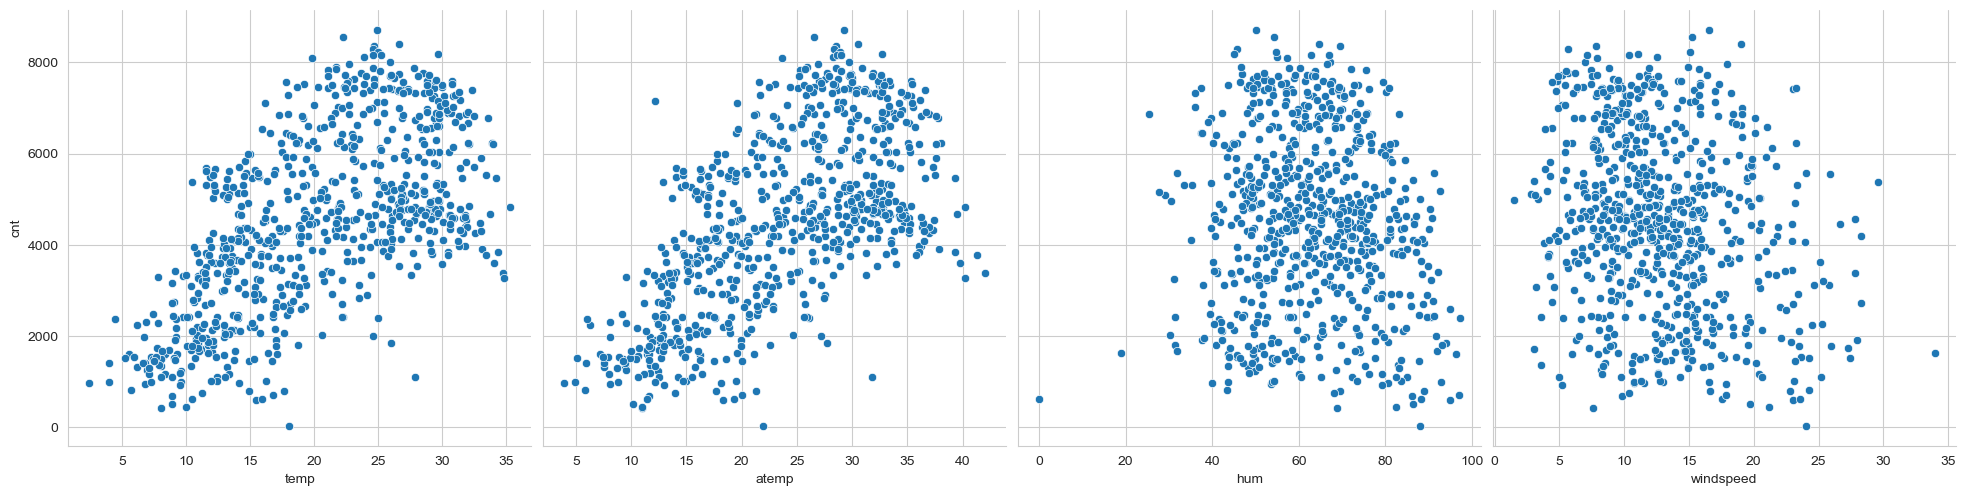

In [17]:
# Visualization Numerical Columns to see pattern in data 
numColumnsFeature = ["temp","atemp","hum","windspeed"]
numColumnTarget = "cnt" 
sns.set_style("whitegrid")
sns.pairplot(data=transactionDf,x_vars=numColumnsFeature,y_vars=numColumnTarget,kind='scatter',height=5,aspect=1);
plt.show()

### Observation
Here are observation from the above plot : 
- Temp and atemp are highly correlated 
- As the temp and atemp increases , the count of rides are also increasing
- There is a visual linear relation between independent (temp,atemp,hum,windspeed) and dependent variable ( cnt) 

Lets look the correlation values of the same

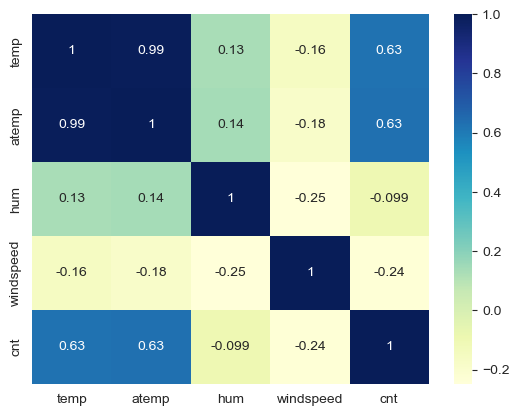

In [18]:
sns.heatmap(transactionDf[numColumns].corr(),annot=True,cmap="YlGnBu")
plt.show()

### Observation

-Temperature (temp) and apparent temperature (atemp) are highly positively correlated, with a correlation coefficient of 0.99. This indicates that these two variables have a strong linear relationship and tend to vary together.

-Temperature (temp) and the bike rental count (cnt) also show a moderately positive correlation of 0.63. This suggests that there is some influence of temperature on the number of bike rentals, but it is not extremely strong.

-Humidity (hum) and windspeed have relatively weak correlations with the bike rental count (cnt). Humidity has a small negative correlation (-0.099) with the rental count, suggesting a slight inverse relationship. Windspeed has a negative correlation of -0.24, indicating a slightly stronger inverse relationship.

### Dropping Column with High Correlation

In [19]:
# As we can interpret from the visualization above that there is high correlation between temp and atemp
# so we need to drop 1 column out of this to avoid multicolinearity, we will be dropping atemp column as this is 
# the user estimated temperature and can vary  and having user feel like temperature will help us to take better decission
transactionDf.drop("temp",axis=1,inplace=True)

In [20]:
transactionDf.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [21]:
transactionDf.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

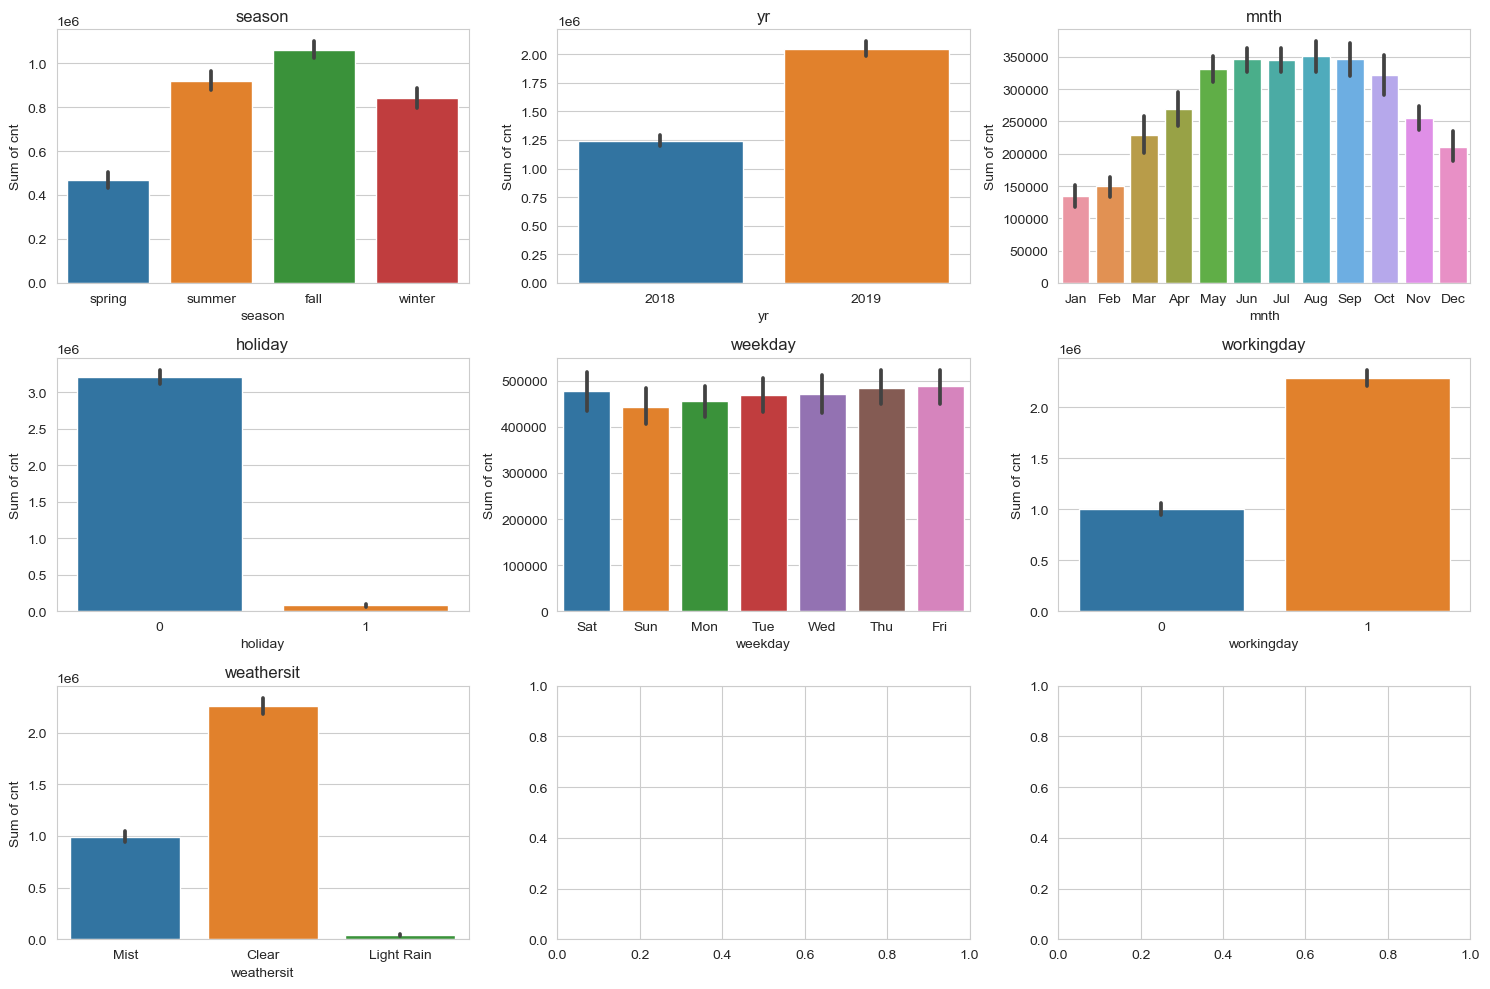

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

categoricalColumns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(categoricalColumns):
    row = i // 3  # Calculate the row index
    col = i % 3  # Calculate the column index
    ax = axes[row, col]
    sns.barplot(data=transactionDf, x=column, y='cnt', estimator=sum, ax=ax)
    ax.set_ylabel('Sum of cnt')
    ax.set_xlabel(column)
    ax.set_title(column)

plt.tight_layout()
plt.show()

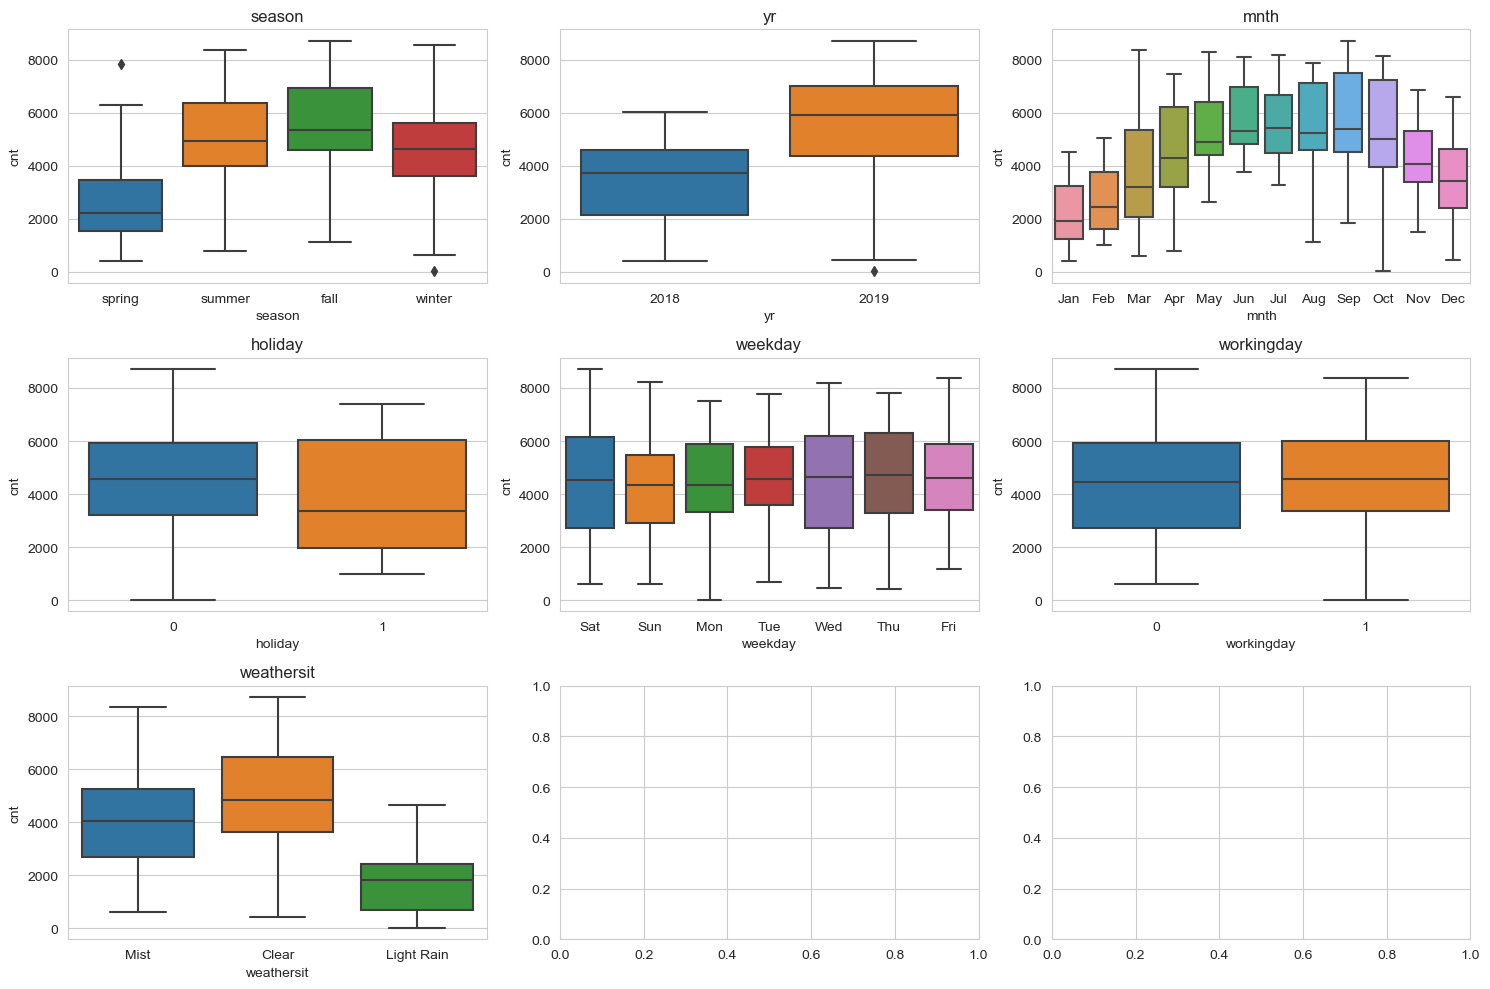

In [23]:
## Now Lets look into categorical columns , We will first draw   boxplots for the columns to understand outliers & 
# distibution of dataset
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(categoricalColumns):
    row = i // 3  # Calculate the row index
    col = i % 3  # Calculate the column index 
    ax = axes[row, col]
    sns.boxplot(x=column,y='cnt',data=transactionDf, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

### Observations
- Summer and fall have more rides as compare to other seasons
- With the change in year , the rides have increased which shows growth of the company 
- Looking at the month , it is visible that rides have increased from jan to july and have decreasing trend from aug to dec
- Holidays show lower rental count compared to workingday
- There is no significant variance in count of rides between different days of the week
- Clear Weather have more rides as compare to Mist and Light Rainy Weather has the lowest rides and no rides when whether condition are with heavy rains / thunderstorm

In [24]:
# If we look at Season and month column , ideally by business knowledge it seems that season already is a grouping of month 
# column , lets look at what the data shows for the same 
pivot_table = transactionDf.pivot_table(index='season', columns='mnth', values='cnt', aggfunc='sum')
pivot_table = pivot_table.fillna(0)
pivot_table

mnth,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
season,,,,,,,,,,,,
fall,0.0,351194.0,0.0,0.0,0.0,344948.0,115388.0,0.0,0.0,0.0,0.0,249599.0
spring,0.0,0.0,42998.0,149518.0,134933.0,0.0,0.0,142065.0,0.0,0.0,0.0,0.0
summer,269094.0,0.0,0.0,0.0,0.0,0.0,230954.0,86855.0,331686.0,0.0,0.0,0.0
winter,0.0,0.0,168038.0,0.0,0.0,0.0,0.0,0.0,0.0,254831.0,322352.0,96392.0


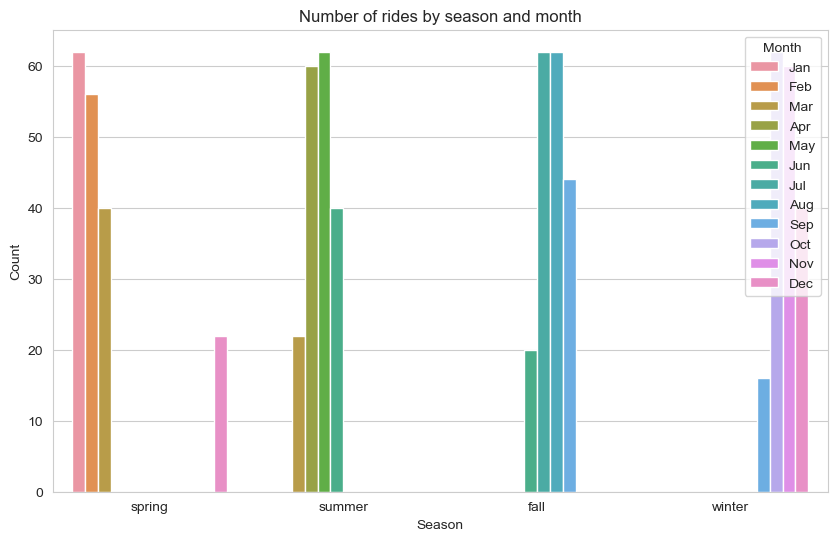

In [25]:
# Now lets look at the same two columns with a plot chart 
plt.figure(figsize=(10, 6))
sns.countplot(data=transactionDf, x='season', hue='mnth')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Number of rides by season and month')
plt.legend(title='Month')
plt.show()

In [26]:
# Both the pivot table above and plot chart above clearly show that there is a correlation between month 
# and season , Since our business goal is to depict a high level prediction , splitting the months in to season and 
# predicting based on the season would add more meaningful, lets drop the month column 
transactionDf.drop("mnth",axis=1,inplace=True)

In [27]:
transactionDf.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,0,Sat,0,Mist,18.18125,80.5833,10.749882,985
1,spring,2018,0,Sun,0,Mist,17.68695,69.6087,16.652113,801
2,spring,2018,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


In [28]:
transactionDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 57.2+ KB


In [29]:
transactionDf.shape

(730, 10)

### Train Test Split

In [30]:
trainTransactionDf, testTransactionDf = train_test_split(transactionDf, train_size = 0.7, random_state = 100)
print(trainTransactionDf.shape)
print(testTransactionDf.shape)

(510, 10)
(220, 10)


In [31]:
trainTransactionDf.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
576,fall,2019,0,Tue,1,Clear,33.1448,70.4167,11.083475,7216
426,spring,2019,0,Sat,0,Mist,20.6746,62.1250,10.792293,4066
728,spring,2019,0,Sun,0,Clear,11.5850,48.3333,23.500518,1796
482,summer,2019,0,Sat,0,Mist,18.8752,48.9583,8.708325,4220
111,summer,2018,0,Fri,1,Mist,16.0977,72.9583,14.707907,1683


## One Hot Encoding (Dummy Variable)

In [32]:
# There are non-ordinal categorical values that needs to be converted to numerical value using dummy variable
# or one hot encoding technique. 
# These variables are : season,yr,mnth,weekday,weathersit
dummyVariables =  ['season', 'yr',   'holiday', 'weekday', 'workingday', 'weathersit']
dummyVariableDf = trainTransactionDf[dummyVariables]
dummyVariableDf = pd.get_dummies(dummyVariableDf,drop_first=True)
dummyVariableDf.head()

,holiday,workingday,season_spring,season_summer,season_winter,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Mist
576,0,1,0,0,0,1,0,0,0,0,1,0,0,0
426,0,0,1,0,0,1,0,1,0,0,0,0,0,1
728,0,0,1,0,0,1,0,0,1,0,0,0,0,0
482,0,0,0,1,0,1,0,1,0,0,0,0,0,1
111,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [33]:
# Now lets drop the original columns and add the above numeric values column to the original dataframe
finalTrainTransactionDf = pd.concat([trainTransactionDf,dummyVariableDf],axis = 1)
finalTrainTransactionDf.drop(dummyVariables,axis=1,inplace=True)
print(finalTrainTransactionDf.shape)
finalTrainTransactionDf.head()

(510, 16)


,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Mist
576,33.1448,70.4167,11.083475,7216,0,0,0,1,0,0,0,0,1,0,0,0
426,20.6746,62.1250,10.792293,4066,1,0,0,1,0,1,0,0,0,0,0,1
728,11.5850,48.3333,23.500518,1796,1,0,0,1,0,0,1,0,0,0,0,0
482,18.8752,48.9583,8.708325,4220,0,1,0,1,0,1,0,0,0,0,0,1
111,16.0977,72.9583,14.707907,1683,0,1,0,0,0,0,0,0,0,0,0,1


## Scaling

In [34]:
# There are columns that have different units of data like temp,atemp,hum,windspeed . 
# We will be applying Min-Scaling which scale the data between the specific range of 0 and 1 
# preserving the original distribution
scaler = MinMaxScaler()
scalingColumns = ["atemp", "hum", "windspeed"]
finalTrainTransactionDf[scalingColumns] = scaler.fit_transform(finalTrainTransactionDf[scalingColumns])
print(finalTrainTransactionDf.shape)
finalTrainTransactionDf.head()

(510, 16)


,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Mist
576,0.766351,0.725633,0.264686,7216,0,0,0,1,0,0,0,0,1,0,0,0
426,0.438975,0.640189,0.255342,4066,1,0,0,1,0,1,0,0,0,0,0,1
728,0.200348,0.498067,0.663106,1796,1,0,0,1,0,0,1,0,0,0,0,0
482,0.391735,0.504508,0.188475,4220,0,1,0,1,0,1,0,0,0,0,0,1
111,0.318819,0.751824,0.380981,1683,0,1,0,0,0,0,0,0,0,0,0,1


## Model Building

#### X  and Y splitting

In [35]:
## Getting features (X) and target variable (Y)  from Training Set
x_trainTransactionDf = finalTrainTransactionDf
y_trainTransactionDf = x_trainTransactionDf.pop('cnt')

In [36]:
print(x_trainTransactionDf.shape)
print(y_trainTransactionDf.shape)

(510, 15)
(510,)


###  Feature Selection

In [37]:
## There are three ways to do feature selection , the first one is manual selection , the second is automatic selection and the 
## third is hybrid way where we will start with autoselection and manually remove features
## that have high vpf score or high p value

## Lets start with an assumption of keeping 10 variables and do RFE (Recursive Feature Elimination)

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=12) 
 
rfe.fit(x_trainTransactionDf ,y_trainTransactionDf)
selected_features = x_trainTransactionDf.columns[rfe.support_]
list(zip(x_trainTransactionDf.columns , rfe.support_ , rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 2),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 3),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [38]:
colSelectByRFE = x_trainTransactionDf.columns[rfe.support_]
colNotSelectedByRFE = x_trainTransactionDf.columns[~rfe.support_]
print("Not Selected By RFE\n", colNotSelectedByRFE)
print("Selected By RFE")
print(colSelectByRFE)

Not Selected By RFE
 Index(['weekday_Sat', 'weekday_Thu', 'weekday_Wed'], dtype='object')
Selected By RFE
Index(['atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'weekday_Mon', 'weekday_Sun', 'weekday_Tue',
       'weathersit_Light Rain', 'weathersit_Mist'],
      dtype='object')


## Model Building

In [39]:
## We will be using StatsModel Api to build the model and we will be starting the model with the 15 columns 
## selected by the RFE method above
x_trainTransactionDf_rfe = x_trainTransactionDf[colSelectByRFE]
x_trainTransactionDf_rfe.head()

,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,weekday_Mon,weekday_Sun,weekday_Tue,weathersit_Light Rain,weathersit_Mist
576,0.766351,0.725633,0.264686,0,0,0,1,0,0,1,0,0
426,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,1
728,0.200348,0.498067,0.663106,1,0,0,1,0,1,0,0,0
482,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,1
111,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,1


In [40]:
y_trainTransactionDf.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [41]:
#adding constant to training variable as required by StatsModel 
x_trainTransactionDf_rfe_sm = sm.add_constant(x_trainTransactionDf_rfe) 
#creating first training model with rfe selected variables
model = sm.OLS(y_trainTransactionDf, x_trainTransactionDf_rfe_sm)
model1 = model.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.4
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          9.95e-181
Time:                        17:41:49   Log-Likelihood:                -4139.1
No. Observations:                 510   AIC:                             8304.
Df Residuals:                     497   BIC:                             8359.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2772.4773    305.124      9.086      0.000    2172.985    3371.970
atemp                  4289.5667    308.154     13.920      0.000    3684.121    4895.012
hum                   -1095.0153    342.120     -3.201      0.001   -1767.194    -422.836
windspeed             -1418.1189    234.100     -6.058      0.000   -1878.066    -958.172
season_spring          -843.5884    172.826     -4.881      0.000   -1183.148    -504.029
season_summer           262.0181    117.307      2.234      0.026      31.539     492.498
season_winter           585.3376    141.139      4.147      0.000     308.035     862.641
yr_2019                2031.9961     73.901     27.496      0.000    1886.799    2177.194
weekday_Mon            -273.4934    105.554     -2.591      0.010    -480.880     -66.107
weekday_Sun            -469.2191    108.081     -4.341      0.000    -681.570    -256.868
weekday_Tue            -140.3683    111.418     -1.260      0.208    -359.277      78.540
weathersit_Light Rain -2116.8946    240.691     -8.795      0.000   -2589.792   -1643.998
weathersit_Mist        -486.9334     95.651     -5.091      0.000    -674.865    -299.002
==============================================================================
Omnibus:                       85.581   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.450
Skew:                          -0.794   Prob(JB):                     9.21e-56
Kurtosis:                       6.067   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# We need to have VIF below 5 and p value less than .05 , By looking at P Value of all the features , we can see that 
# p value for all the features are lower than .05 . Now looking at VIF, we can see that season_spring has VIF of 5.08
# which means that this variable has a higher multi coliniearity with other features , lets drop this and create 
# our second model with the remaining features 
#adding constant to training variable as required by StatsModel
x_trainTransactionDf_rfe2 = x_trainTransactionDf_rfe.drop("weekday_Tue",axis=1)
x_trainTransactionDf_rfe2_sm = sm.add_constant(x_trainTransactionDf_rfe2)

#creating first training model with rfe selected variables
model = sm.OLS(y_trainTransactionDf, x_trainTransactionDf_rfe2_sm)
model1 = model.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          1.46e-181
Time:                        17:41:49   Log-Likelihood:                -4139.9
No. Observations:                 510   AIC:                             8304.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2762.1815    305.195      9.051      0.000    2162.554    3361.809
atemp                  4279.1840    308.225     13.883      0.000    3673.602    4884.766
hum                   -1107.6198    342.175     -3.237      0.001   -1779.904    -435.335
windspeed             -1422.0376    234.217     -6.071      0.000   -1882.213    -961.862
season_spring          -845.5927    172.920     -4.890      0.000   -1185.336    -505.849
season_summer           258.2194    117.338      2.201      0.028      27.681     488.757
season_winter           582.8472    141.208      4.128      0.000     305.409     860.285
yr_2019                2031.4526     73.944     27.473      0.000    1886.173    2176.732
weekday_Mon            -247.1603    103.524     -2.387      0.017    -450.559     -43.762
weekday_Sun            -442.6075    106.059     -4.173      0.000    -650.986    -234.229
weathersit_Light Rain -2101.8204    240.535     -8.738      0.000   -2574.409   -1629.232
weathersit_Mist        -484.8222     95.693     -5.066      0.000    -672.834    -296.810
==============================================================================
Omnibus:                       83.380   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.537
Skew:                          -0.767   Prob(JB):                     2.40e-55
Kurtosis:                       6.079   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif = pd.DataFrame()
vif['Features'] = x_trainTransactionDf_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_trainTransactionDf_rfe.values, i) for i in range(x_trainTransactionDf_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif


,Features,VIF
1,hum,26.97
0,atemp,14.48
2,windspeed,4.50
3,season_spring,3.51
5,season_winter,2.86
11,weathersit_Mist,2.29
4,season_summer,2.18
6,yr_2019,2.08
7,weekday_Mon,1.27
8,weekday_Sun,1.27


In [44]:
# We need to have VIF below 5 and p value less than .05 , By looking at P Value of all the features , we can see that 
# p value for all the features are lower than .05 . Now looking at VIF, we can see that season_spring has VIF of 5.08
# which means that this variable has a higher multi coliniearity with other features , lets drop this and create 
# our second model with the remaining features 
#adding constant to training variable as required by StatsModel
print(x_trainTransactionDf_rfe2.shape)
x_trainTransactionDf_rfe3 = x_trainTransactionDf_rfe2.drop("hum",axis=1)
print(x_trainTransactionDf_rfe3.shape)
x_trainTransactionDf_rfe3_sm = sm.add_constant(x_trainTransactionDf_rfe3)

#creating first training model with rfe selected variables
model = sm.OLS(y_trainTransactionDf, x_trainTransactionDf_rfe3_sm)
model1 = model.fit()
model1.summary()

(510, 11)
(510, 10)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.1
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          1.63e-180
Time:                        17:41:50   Log-Likelihood:                -4145.2
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     499   BIC:                             8359.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2206.0516    254.628      8.664      0.000    1705.776    2706.328
atemp                  4035.1358    301.687     13.375      0.000    3442.402    4627.870
windspeed             -1208.2006    226.832     -5.326      0.000   -1653.864    -762.537
season_spring          -901.3263    173.687     -5.189      0.000   -1242.575    -560.077
season_summer           224.9884    117.993      1.907      0.057      -6.835     456.812
season_winter           492.0053    139.700      3.522      0.000     217.533     766.478
yr_2019                2058.4077     74.168     27.753      0.000    1912.688    2204.127
weekday_Mon            -263.0631    104.385     -2.520      0.012    -468.152     -57.974
weekday_Sun            -466.6281    106.799     -4.369      0.000    -676.459    -256.797
weathersit_Light Rain -2412.9029    222.587    -10.840      0.000   -2850.226   -1975.580
weathersit_Mist        -665.1556     78.540     -8.469      0.000    -819.466    -510.845
==============================================================================
Omnibus:                       80.620   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.016
Skew:                          -0.758   Prob(JB):                     6.85e-51
Kurtosis:                       5.928   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#calculating the VIF of the model
vif = pd.DataFrame()
vif['Features'] = x_trainTransactionDf_rfe3.columns
vif['VIF'] = [variance_inflation_factor(x_trainTransactionDf_rfe3.values, i) for i in range(x_trainTransactionDf_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,windspeed,4.48
0,atemp,3.64
5,yr_2019,2.07
2,season_spring,1.96
3,season_summer,1.82
4,season_winter,1.65
9,weathersit_Mist,1.53
6,weekday_Mon,1.21
7,weekday_Sun,1.21
8,weathersit_Light Rain,1.08


In [46]:
finalColsForPrediction = x_trainTransactionDf_rfe3.columns
print(finalColsForPrediction)

Index(['atemp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'weekday_Mon', 'weekday_Sun', 'weathersit_Light Rain',
       'weathersit_Mist'],
      dtype='object')


Based on the analysis, all variables in the model are found to be significant, and their VIF values are less than 5, indicating no significant multicollinearity. Hence, we can consider this as the final model with 10 parameters.

The model exhibits a high level of goodness of fit, with an R-squared value of 82.3% and an adjusted R-squared value of 82%. These values indicate that approximately 82.3% of the variance in the target variable can be explained by the independent variables included in the model. The adjusted R-squared accounts for the number of predictors in the model, providing a more reliable measure of model performance.

## Residual Analysis

In [47]:
print(x_trainTransactionDf_rfe3.shape)
x_trainTransactionDf_rfe3.head()

(510, 10)


,atemp,windspeed,season_spring,season_summer,season_winter,yr_2019,weekday_Mon,weekday_Sun,weathersit_Light Rain,weathersit_Mist
576,0.766351,0.264686,0,0,0,1,0,0,0,0
426,0.438975,0.255342,1,0,0,1,0,0,0,1
728,0.200348,0.663106,1,0,0,1,0,1,0,0
482,0.391735,0.188475,0,1,0,1,0,0,0,1
111,0.318819,0.380981,0,1,0,0,0,0,0,1


In [48]:
y_trainPredict = model1.predict(x_trainTransactionDf_rfe3_sm)

<Figure size 640x480 with 0 Axes>

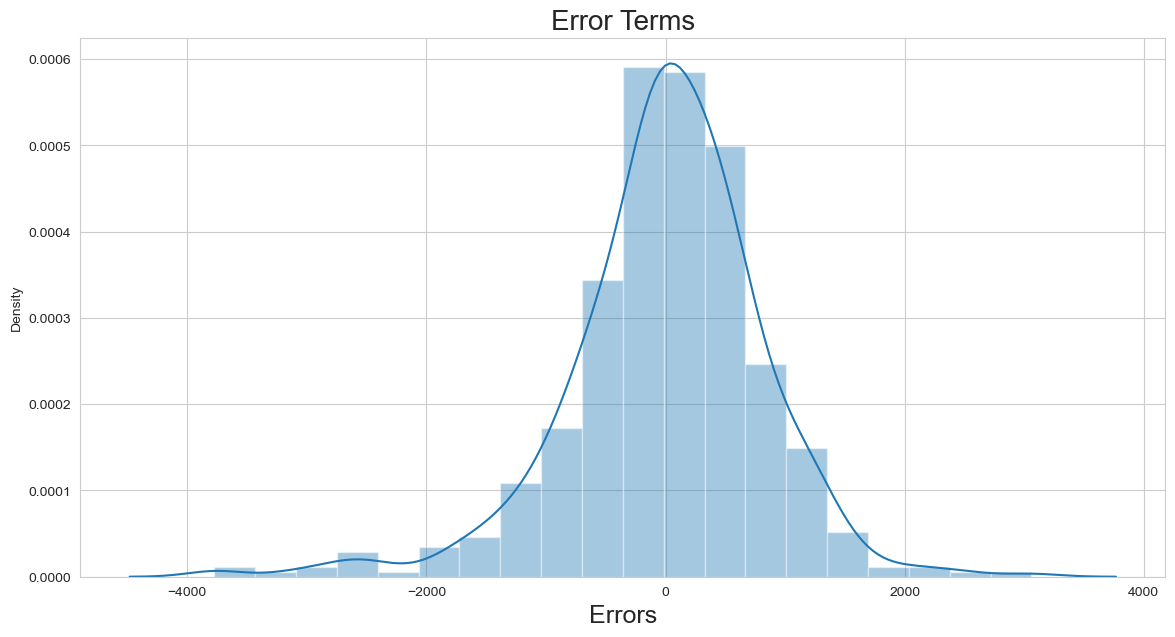

In [49]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_trainTransactionDf - y_trainPredict), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

We can see in the above that error terms are normally distributed

### Prediction

In [50]:
## In our train model ,we used this variable to define columns that need to be scaled , we will be performing 
## same scaling to test data 
scalingColumns

['atemp', 'hum', 'windspeed']

In [51]:
testTransactionDf[scalingColumns] = scaler.transform(testTransactionDf[scalingColumns])
testTransactionDf.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
184,fall,2018,1,Mon,0,Mist,0.769660,0.657364,0.084219,6043
535,summer,2019,0,Wed,1,Clear,0.842587,0.610133,0.153728,6211
299,winter,2018,0,Thu,1,Mist,0.496145,0.837699,0.334206,2659
221,fall,2018,0,Wed,1,Clear,0.795343,0.437098,0.339570,4780
152,summer,2018,0,Thu,1,Clear,0.741471,0.314298,0.537414,4968


In [52]:
# There are non-ordinal categorical values that needs to be converted to numerical value using dummy variable
# or one hot encoding technique. 
# These variables are : season,yr,mnth,weekday,weathersit
dummyVariables =  ['season', 'yr',   'holiday', 'weekday', 'workingday', 'weathersit']
dummyVariableDf = testTransactionDf[dummyVariables]
dummyVariableDf = pd.get_dummies(dummyVariableDf,drop_first=True)
dummyVariableDf.head()


# Now lets drop the original columns and add the above numeric values column to the original dataframe
finalTestTransactionDf = pd.concat([testTransactionDf,dummyVariableDf],axis = 1)
finalTestTransactionDf.drop(dummyVariables,axis=1,inplace=True)
print(finalTestTransactionDf.shape)
finalTestTransactionDf.head()

(220, 16)


,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain,weathersit_Mist
184,0.769660,0.657364,0.084219,6043,0,0,0,0,1,0,0,0,0,0,0,1
535,0.842587,0.610133,0.153728,6211,0,1,0,1,0,0,0,0,0,1,0,0
299,0.496145,0.837699,0.334206,2659,0,0,1,0,0,0,0,1,0,0,0,1
221,0.795343,0.437098,0.339570,4780,0,0,0,0,0,0,0,0,0,1,0,0
152,0.741471,0.314298,0.537414,4968,0,1,0,0,0,0,0,1,0,0,0,0


In [53]:
# Splitting testTransaction into feature and target 
y_testTransactionDf = finalTestTransactionDf.pop('cnt')
x_testTransactionDf = finalTestTransactionDf
print(x_testTransactionDf.shape)
print(y_testTransactionDf.shape)

(220, 15)
(220,)


In [62]:
# Taking final set of columns , we finalized for prediction with our final model
print(finalColsForPrediction)
x_testTransactionDf_selected = x_testTransactionDf[finalColsForPrediction]
x_testTransactionDf_selected_sm = sm.add_constant(x_testTransactionDf_selected)
y_test_pred  = model1.predict(x_testTransactionDf_selected_sm)

print(x_testTransactionDf_selected_sm.shape)
print(y_test_pred.shape)

Index(['atemp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'weekday_Mon', 'weekday_Sun', 'weathersit_Light Rain',
       'weathersit_Mist'],
      dtype='object')
(220, 11)
(220,)


In [65]:
# Getting Rsquared and Ajusted Rsquared for the above test data
r2_score(y_testTransactionDf,y_test_pred)

0.803714558369295

In [66]:
Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


## Model Evaluation

<Figure size 640x480 with 0 Axes>

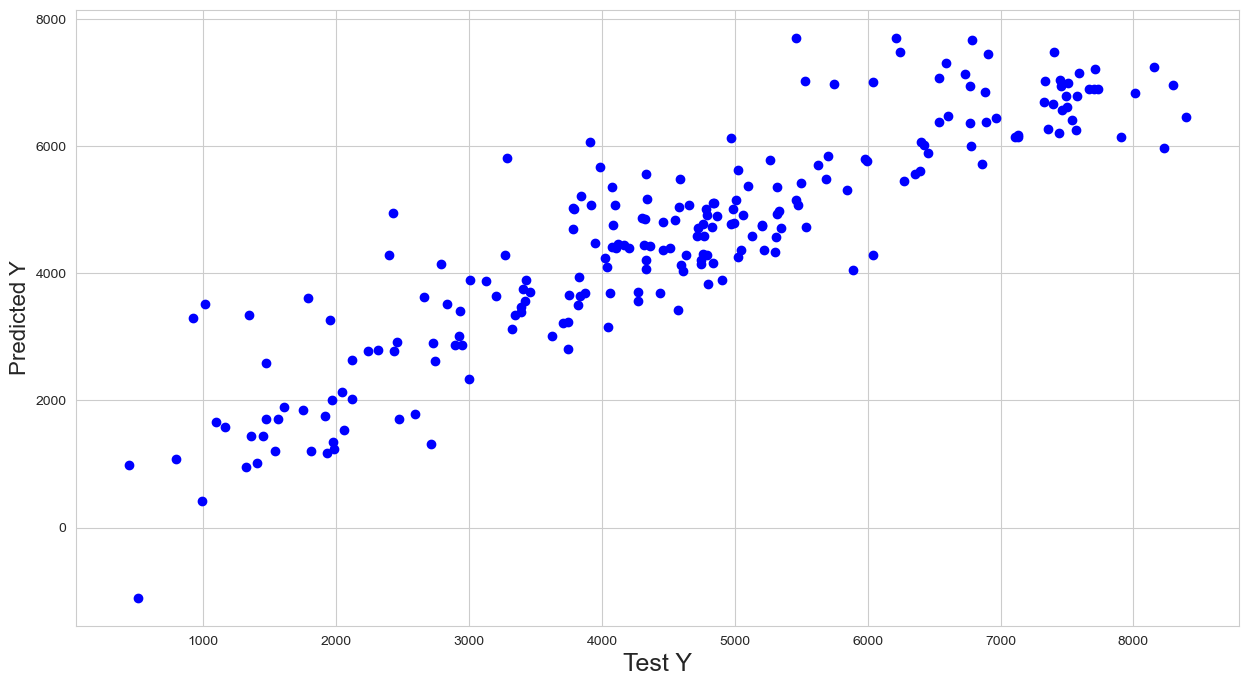

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_testTransactionDf,y_test_pred,color='blue')
fig.suptitle('Test Y  vs Predicted Y', fontsize=20)              # Plot heading 
plt.xlabel('Test Y', fontsize=18)                          # X-label
plt.ylabel('Predicted Y', fontsize=16)                          # Y-label
plt.show()

<Figure size 1500x800 with 0 Axes>

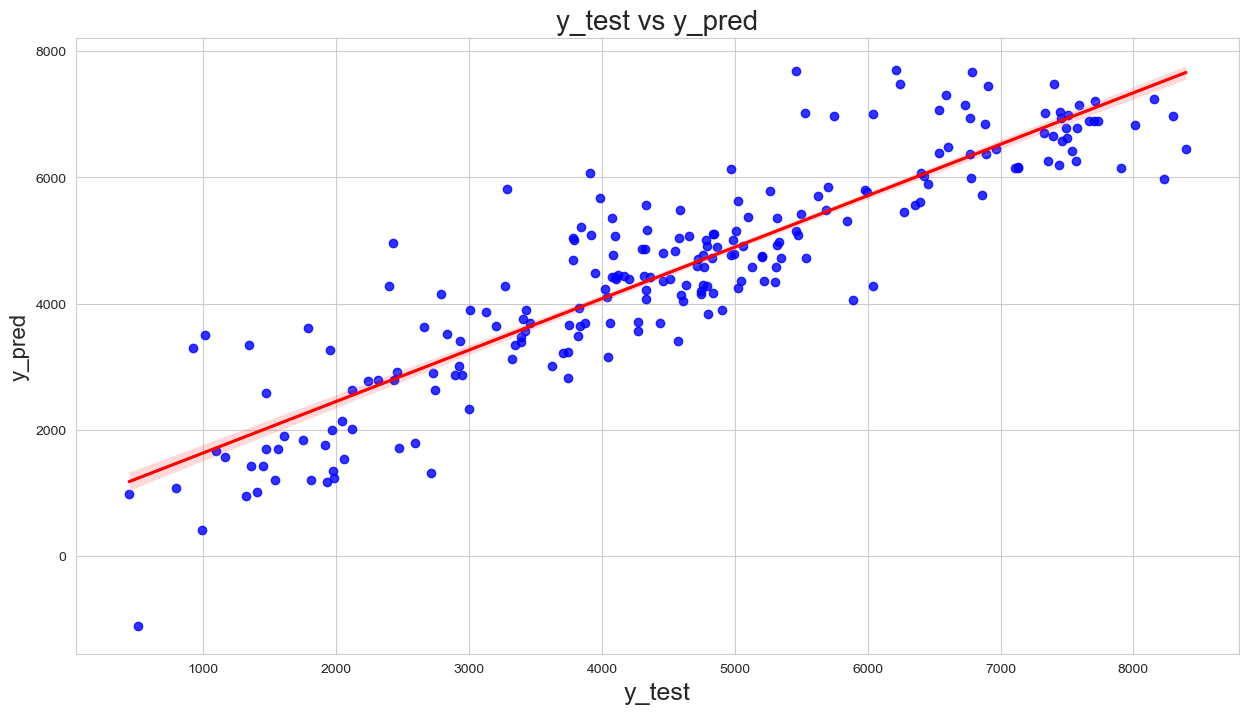

In [71]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_testTransactionDf, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [88]:
# Assuming you have a trained linear regression model named `model`
coefficients = model1.params[1:]

# Assuming you have a list of feature names in the same order as the coefficients
feature_names = finalColsForPrediction
print( feature_names)
print(coefficients)
# Print the equation
equation = "count = "
for i in range(len(coefficients)):
    equation += f"{coefficients[i]:.4f} * {feature_names[i]} + "
equation = equation[:-3]  # Remove the trailing '+'
print(equation)

Index(['atemp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'weekday_Mon', 'weekday_Sun', 'weathersit_Light Rain',
       'weathersit_Mist'],
      dtype='object')
atemp                    4035.135845
windspeed               -1208.200603
season_spring            -901.326303
season_summer             224.988355
season_winter             492.005336
yr_2019                  2058.407693
weekday_Mon              -263.063060
weekday_Sun              -466.628145
weathersit_Light Rain   -2412.902855
weathersit_Mist          -665.155583
dtype: float64
count = 4035.1358 * atemp + -1208.2006 * windspeed + -901.3263 * season_spring + 224.9884 * season_summer + 492.0053 * season_winter + 2058.4077 * yr_2019 + -263.0631 * weekday_Mon + -466.6281 * weekday_Sun + -2412.9029 * weathersit_Light Rain + -665.1556 * weathersit_Mist


In [89]:
## Conclusion